In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import flopy.modflow as mf
import flopy.utils as fu
import shutil
import json
import sys

In [2]:
print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.7 (v3.6.7:6ec5cf24b7, Oct 20 2018, 13:35:33) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.14.3
matplotlib version: 3.0.2
flopy version: 3.2.10


In [3]:
simple_case = os.path.join('simple-case')
if os.path.exists(simple_case):
    shutil.rmtree(simple_case)
    
if not os.path.exists(simple_case):
    os.makedirs(simple_case)

In [4]:
modelname = 'model'
ml = mf.Modflow(modelname=modelname, exe_name='mf2005', version='mf2005', model_ws=simple_case)

In [5]:
nlay = 5
nrow = 10
ncol = 10
ly = 100
lx = 100
delc = lx/ncol
delr = ly/nrow
nper = 5
top = 50
botm = [47,30,20,10,0]
steady = np.full ( nper, False, dtype=bool )
steady[ 0 ] = True

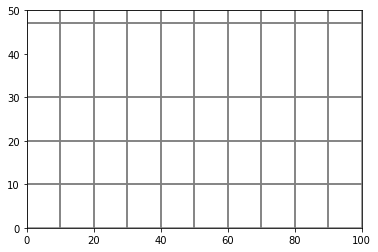

In [6]:
dis = mf.ModflowDis(
    ml, 
    nlay=nlay,
    nrow=nrow, 
    ncol=ncol, 
    delr=delr, 
    delc=delc, 
    top=top, 
    botm=botm, 
    nper=nper, 
    steady=steady
)
modelxsect= flopy.plot.ModelCrossSection(model=ml, line={'Row':0})
linecollection= modelxsect.plot_grid()

In [7]:
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)

for i in range ( 0, 1 ):
    ibound[ i, :, 0 ] = -1
    ibound[ i, :, -1 ] = -1

strt = np.ones ( (nlay, nrow, ncol), dtype=np.int32 ) * 50
    
bas = mf.ModflowBas(ml,ibound=ibound, strt=strt)

In [8]:
spchd = {}
spchd[0] = [
    [1, 0, 0, 47, 47 ], 
    [1, 0, ncol-1, 47, 47]
]
for row in range(1,nrow):
    spchd[0].append ([1, row, 0, 47, 47 ])
    spchd[0].append ([1, row, ncol-1, 47, 47 ])
    
    
for stress_period in range ( 1, nper ):
    spchd[stress_period] = [[1, 0, 0, 48, 48],
                           [1, 0, ncol-1, 48, 48]]
    for row in range(1,nrow):
        spchd[stress_period].append ([1, row, 0, 48, 48 ])
        spchd[stress_period].append ([1, row, ncol-1, 48, 48 ])
    

chd = mf.ModflowChd(ml, stress_period_data=spchd)

In [9]:
spwell = {}
spwell[0] = [2, 5, 5, 0]

wel_data = [20,30,20,40]
for i in range(1, nper):
    spwell[i] = [3, 5, 5, -wel_data[i-1]]

wel = mf.ModflowWel(ml, stress_period_data=spwell, ipakcb=53)

#wel.plot()

In [10]:
laytyp = [1, 1, 1, 1, 1]

sy = 0.17
ss = 1e-4

lpf = mf.ModflowLpf(ml, laytyp=laytyp,  layvka=0, sy=sy, ss=ss, ipakcb=53)

In [11]:
oc = mf.ModflowOc(ml, 
                   save_every=True,
                   save_types=['print head', 'print budget','print drawdown', 'save head', 'save budget','save drawdown'],
                   compact=True
                  )
pcg = mf.ModflowPcg (ml, rclose=1e-1)

In [12]:
ml.write_input()
success = ml.run_model(silent=True)

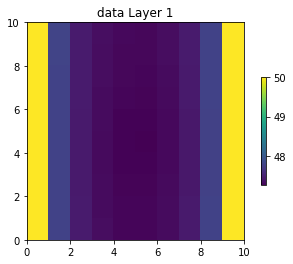

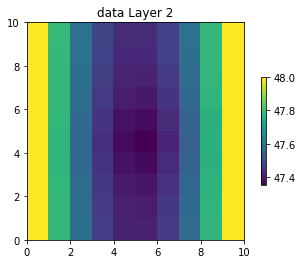

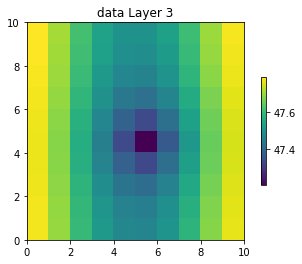

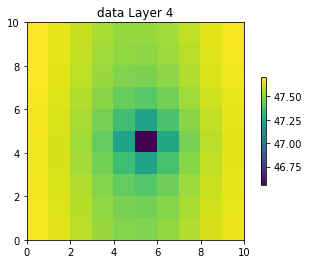

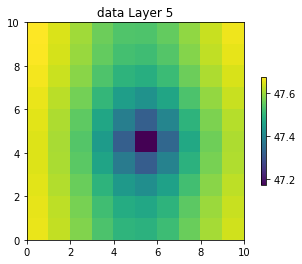

In [13]:
hds = fu.HeadFile('simple-case\model.hds')
hds.plot(colorbar=True)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...


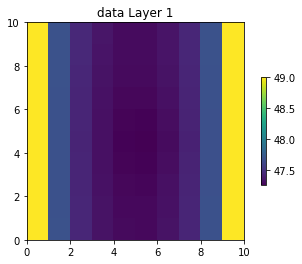

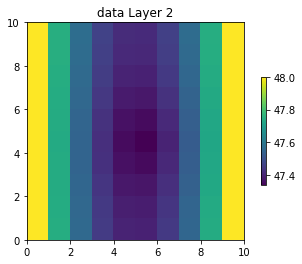

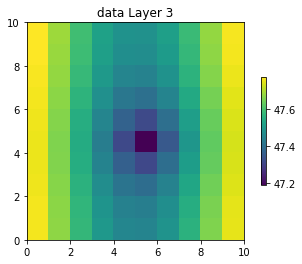

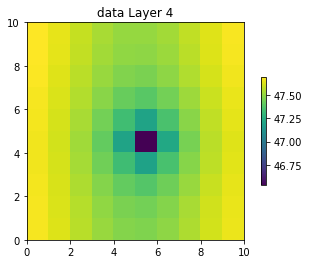

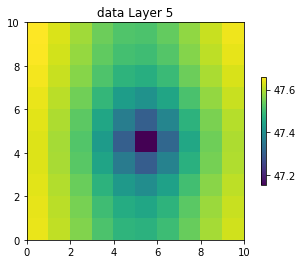

In [14]:
strt = np.ones ( (nlay, nrow, ncol), dtype=np.int32 ) * 49
bas = mf.ModflowBas(ml,ibound=ibound, strt=strt)
ml.write_input()
success = ml.run_model(silent=True)
hds = fu.HeadFile('simple-case\model.hds')
hds.plot(colorbar=True)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...


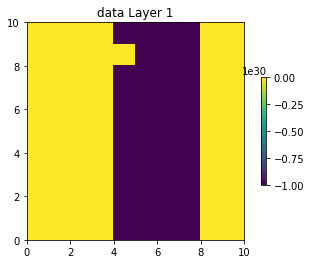

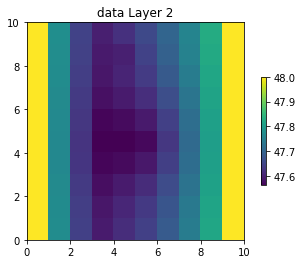

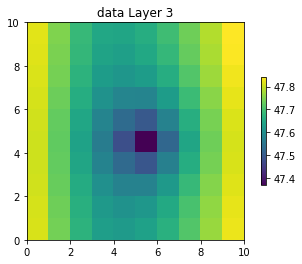

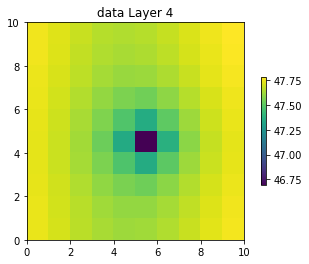

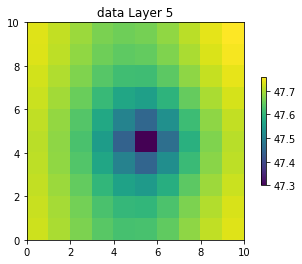

In [15]:
strt = np.ones ( (nlay, nrow, ncol), dtype=np.int32 ) * 48
bas = mf.ModflowBas(ml,ibound=ibound, strt=strt)
ml.write_input()
success = ml.run_model(silent=True)
hds = fu.HeadFile('simple-case\model.hds')
hds.plot(colorbar=True)